In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

C:\Users\Muthu Palaniappan M\AppData\Local\Temp\ipykernel_26308\428149251.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [37]:
def load_glove():
    glove_path = 'glove.6B.50d.txt'

    embeddings_index = {}
    f = open(glove_path, encoding="utf-8")
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    print('Found %s word vectors.' % len(embeddings_index))
    
    return embeddings_index

glove_embeddings_50d = load_glove()

Found 400000 word vectors.


### Reducing Dimensionality for Visualization
To visualize the word embeddings, we need to reduce their dimensions from 50 to 2 using a dimensionality reduction technique like t-SNE (t-distributed stochastic neighbor embedding). t-SNE is a popular technique for nonlinear dimensionality reduction, which retains most of the original information while reducing the number of dimensions.

In [38]:
from sklearn.manifold import TSNE

In [61]:
def reduce_to_2d(embeddings_index):
    words = list(embeddings_index.keys())
    vectors = np.array([embeddings_index[word] for word in words])
    
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)
    
    reduced_embeddings = dict(zip(words, reduced_vectors))
    return reduced_embeddings

glove_embeddings_2d = reduce_to_2d(glove_embeddings_50d)

### Distance Metrics Comparsion Functions

In [62]:
def manhattan_distance(vector1, vector2):
    return sum(abs(a - b) for a, b in zip(vector1, vector2))

In [63]:
def find_closest_word(embeddings, target_vector):
    min_distance = float('inf')
    closest_word = None

    for word, vector in embeddings.items():
        distance = manhattan_distance(target_vector, vector)
        if distance < min_distance:
            min_distance = distance
            closest_word = word
    return closest_word

### Visualizing Geometric Relationships

#### Example 1: Chinese - China + Japan = ?

In [64]:
def plot_embedding_vectors(vectors):
    fig, ax = plt.subplots()

    # Plot the points
    ax.scatter([v[0] for v in vectors[:3]], [v[1] for v in vectors[:3]], c='blue', label='Words', marker='o')
    ax.scatter(vectors[3][0], vectors[3][1], c='red', label='Result Vector', marker='x')
    ax.scatter(vectors[4][0], vectors[4][1], c='green', label='Closest Word', marker='s')

    # Draw arrows
    ax.arrow(vectors[1][0], vectors[1][1], vectors[0][0] - vectors[1][0], vectors[0][1] - vectors[1][1],
             head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    ax.arrow(vectors[2][0], vectors[2][1], vectors[3][0] - vectors[2][0], vectors[3][1] - vectors[2][1],
             head_width=0.05, head_length=0.05, fc='blue', ec='blue')

    # Label points
    labels = [word1, word2, word3, 'Result', closest_word]
    for i in range(len(vectors)):
        ax.text(vectors[i][0], vectors[i][1], labels[i], fontsize=12, ha='right')

    # Legend
    ax.legend()

    plt.show()

In [65]:
embeddings = glove_embeddings_2d
word1 = 'chinese'
word2 = 'china'
word3 = 'japan'

In [66]:
vector1 = embeddings[word1]
vector2 = embeddings[word2]
vector3 = embeddings[word3]

In [67]:
result_vector = vector1 - vector2 + vector3
closest_word = find_closest_word(embeddings, result_vector)

In [68]:
closest_word

'japan'

In [69]:
print(f'For the operation: {word1} - {word2} + {word3}')
print(f'The result vector is closest to the embedding: {closest_word}')

For the operation: chinese - china + japan
The result vector is closest to the embedding: japan


In [70]:
embedding_vectors = [vector1, vector2, vector3, result_vector, embeddings[closest_word]]

In [71]:
embedding_vectors

[array([96.691376 ,  5.4622197], dtype=float32),
 array([96.6917  ,  5.463201], dtype=float32),
 array([96.69594 ,  5.469576], dtype=float32),
 array([96.69561  ,  5.4685946], dtype=float32),
 array([96.69594 ,  5.469576], dtype=float32)]

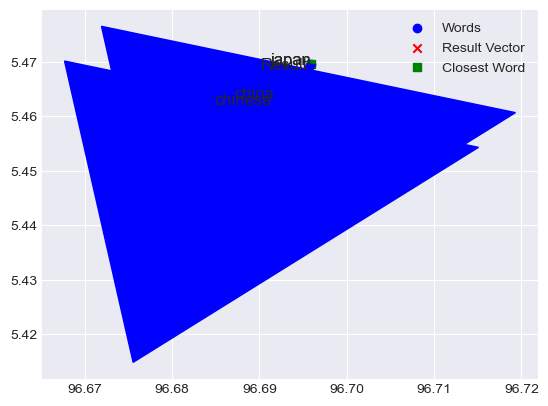

In [72]:
plot_embedding_vectors(embedding_vectors)

### Observations
- We can see the relationship of China to Chinese is similar to that of Japan to Japanese.
- We can also see that it's not a perfect mapping, which is likely due to the low-dimensional embedding, and possible error in how they were mapped.

### Example 2: cold - hot + dark = ?

In [73]:
embeddings = glove_embeddings_2d
word1 = 'cold'
word2 = 'warm'
word3 = 'dark'

In [74]:
vector1 = embeddings[word1]
vector2 = embeddings[word2]
vector3 = embeddings[word3]

result_vector = vector1 - vector2 + vector3
closest_word = find_closest_word(embeddings, result_vector)

In [75]:
closest_word

'green'

For the operation: cold - warm + dark
The result vector is closest to the embedding: green


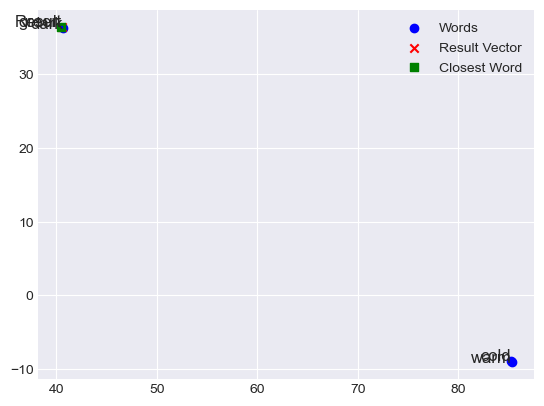

In [76]:
embedding_vectors = [vector1, vector2, vector3, result_vector, embeddings[closest_word]]

print(f'For the operation: {word1} - {word2} + {word3}')
print(f'The result vector is closest to the embedding: {closest_word}')

# The space is a little sparse, so we perform a quick linear transformation
# to reduce the sparsity whilst preserving relationships between vectors.
lin_transformation = np.array([[1.6, 1], [1, 1.6]])
vectors = embedding_vectors

# Scale the vectors by the matrix
scaled_vectors = [np.matmul(lin_transformation, vector) for vector in vectors]

plot_embedding_vectors(embedding_vectors)

For the operation: increase - more + less
The result vector is closest to the embedding: throughput


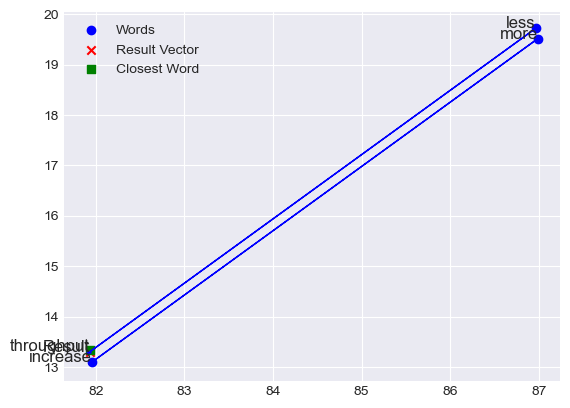

In [77]:
embeddings = glove_embeddings_2d
word1 = 'increase'
word2 = 'more'
word3 = 'less'

vector1 = embeddings[word1]
vector2 = embeddings[word2]
vector3 = embeddings[word3]

result_vector = vector1 - vector2 + vector3
closest_word = find_closest_word(embeddings, result_vector)

embedding_vectors = [vector1, vector2, vector3, result_vector, embeddings[closest_word]]

print(f'For the operation: {word1} - {word2} + {word3}')
print(f'The result vector is closest to the embedding: {closest_word}')

plot_embedding_vectors(embedding_vectors)